# Universidade Federal do Rio Grande do Sul
# Programa de Pós-Graduação em Engenharia Civil
# Área de Concentração: Estruturas
# PEC00025 - Introdução à Teoria de Vibrações
# Aluno: Jherbyson Williams Silva Brito (00312164)

## _Trabalho 2.2: Resposta de um sistema com N GDL a um impulso no topo: Respostas dinâmicas_

### 1. Objetivos

Este trabalho tem como objetivo avaliar a resposta de uma estrutura com n graus de liberdadde (GDL) submetida a um impacto de tempo curto de velocidade inicial v0.

Como objetivos específicos temos:

1. Calcular e apresentar os primeiros 4 modos de vibração;

2. Calcular os parâmetros $\theta i = \frac{\pi}{2}$ e $u_imax$ para a velocidade $v_o$ no nó escolhido;

3. Plotar $\vec{u}(t)$ para o G.D.L que recebeu o impacto.


### 2. Descrição da estrutura

A estrutura escolhida para o trabalho foi um pórtico plano, com largura de 3 metros e altura total de 33 metros, com 10 nós internos conforme sugerido em sala de aula. As vigas possuem dimensões de 20x50 cm, e os pilares 30x60 cm, sendo ambos em concreto armado ($\gamma_c = 2500 \frac{kg}{m³}$).

Segue imagem do modelo estrutural no software _Ftool_:

[Imagem do Ftool](http://localhost:8888/view/OneDrive%20-%20Universidade%20Federal%20do%20Rio%20Grande%20do%20Sul/Mestrado%20-%20UFRGS/PPGEC%20-%20Estruturas/1º%20Ano%20-%20Disciplinas/Introdução%20à%20Teoria%20de%20Vibrações/Trabalho%202.2/Estrutura%20estudada.JPG)


### 3. Memória de Cálculo

#### 3.1 Importação das matrizes de rigidez e massa

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as sc

In [81]:
#### Matriz de flexibilidade da estrutura, em m/N:
H1 = np.array([[1.196, 1.072, 0.939, 0.806, 0.675, 0.549, 0.428, 0.315, 0.209, 0.115, 0.038],
               [1.072, 0.996, 0.888, 0.768, 0.647, 0.528, 0.414, 0.306, 0.204, 0.112, 0.037],
               [0.939, 0.888, 0.824, 0.727, 0.618, 0.507, 0.400, 0.296, 0.199, 0.110, 0.037],
               [0.806, 0.766, 0.727, 0.672, 0.586, 0.486, 0.385, 0.287, 0.194, 0.108, 0.036],
               [0.675, 0.647, 0.618, 0.586, 0.539, 0.461, 0.367, 0.278, 0.189, 0.106, 0.036],
               [0.549, 0.528, 0.507, 0.486, 0.461, 0.421, 0.351, 0.268, 0.183, 0.104, 0.035],
               [0.428, 0.414, 0.400, 0.385, 0.367, 0.351, 0.318, 0.254, 0.177, 0.100, 0.035],
               [0.315, 0.306, 0.296, 0.287, 0.278, 0.268, 0.254, 0.226, 0.167, 0.098, 0.034],
               [0.209, 0.204, 0.199, 0.194, 0.189, 0.183, 0.177, 0.167, 0.144, 0.091, 0.034],
               [0.115, 0.112, 0.110, 0.108, 0.106, 0.104, 0.100, 0.098, 0.091, 0.072, 0.033],
               [0.038, 0.037, 0.037, 0.036, 0.036, 0.035, 0.035, 0.034, 0.034, 0.029, 0.029]])*1e-6

K1 = np.linalg.inv(H1)

# Matriz de massa da estrutura, em kg:

M1 = np.array([[375, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
               [0, 1725, 0, 0, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 1725, 0, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 1725, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 1725, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 1725, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 1725, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 1725, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 1725, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 1725, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1725]])

In [82]:
# Calculando os autovalores:
w21, Phi1 = sc.eig(K1, M1)




# Autovetores para as frequências de vibração
wk1  = np.sqrt(np.real(w21)) 
fk1  = wk1/2/np.pi

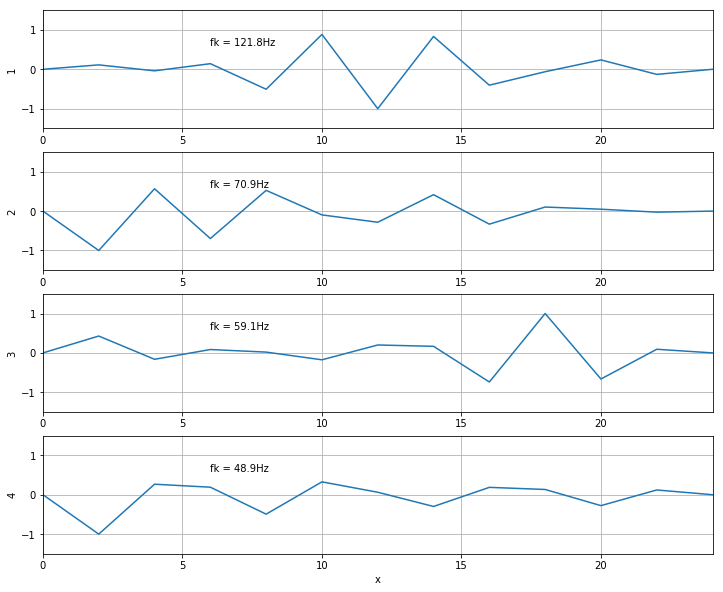

In [84]:
plt.figure(1, figsize=(12,10))
x = np.arange(0, 26, 2)

for k in range(4):
    pk = np.zeros(13)
    pk[1:-1] = Phi1[:,k]
    pk /= np.max(np.abs(pk))   # ajustando escala para amplitude unitária
    
    plt.subplot(4,1,k+1)
    plt.plot(x, pk)
    
    plt.xlim( 0.0, 24.0);
    plt.ylim(-1.5,  1.5);  plt.ylabel(str(k+1));
    plt.text(6, 0.6, 'fk = {0:3.1f}Hz'.format(fk1[k]));
    plt.grid(True)

plt.xlabel('x');

In [85]:
fmax = np.min(fk1)
print(fmax)
Fa = 50000
Tn = 1/fmax
td = Tn/4
m = 3000
vo = Fa*td/m
print(vo)

vo_v=[vo, 0 , 0, 0, 0, 0, 0, 0, 0, 0, 0]

uo_v =np.zeros(11)

1.9305083095649873
2.158326201458084


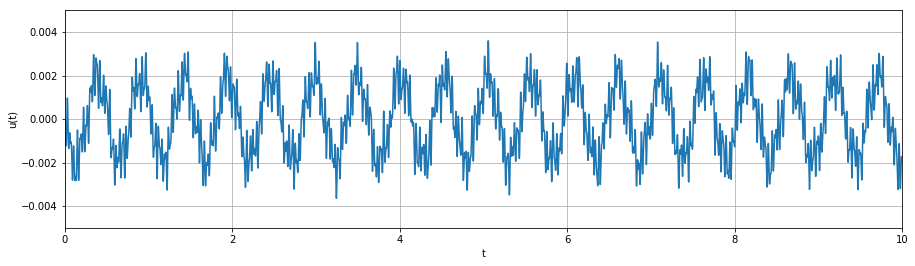

In [86]:
Phit = Phi1
for k in range(11):

    Phit[k] = Phi1[k].transpose() #calculando as transpostas dos autovalores
    

xi =  np.pi/2
UMAX =np.zeros(11)

for k in range (11):
    Mi=np.dot(np.dot(Phit[k], M1), Phi1[k])
    umax = (np.dot(np.dot(Phit[k], M1),vo_v)) /  (wk1[k] * np.sin(xi)* Mi) #calculo das amplitudes máximas
   
    UMAX[k]=umax
    


t = np.linspace(0,10,10000)   #vetor representando o tempo.
uk = np.zeros((11, 10000))    # criando uma matriz 11x100 para receber os valores de deslocamentos

for k in range(11):
    
            uk[k,:] = UMAX[k]*np.cos(-wk1[k]*t - np.pi/2)
 
u = np.dot(Phi1, uk)  #produto dos autovalores pela matriz de deslocamentos

plt.figure(2, figsize=(15,4))
plt.plot(t,u[5,:]) #plotando o 6 nó (maiores deslocamentos)
plt.xlim( 0.0, 10.0); plt.xlabel("t");
plt.ylim(-0.005,0.005);  plt.ylabel("u(t)");
plt.grid(True)

In [87]:
zeta =np.zeros(11)
zeta[0] = 0.01
zeta[1] = 0.01
alfa1 = 2*(zeta[0]* wk1[0]-zeta[1]*wk1[1])/(wk1[0]**2-wk1[1]**2)
alfa0 = 2*zeta[0]*wk1[0]-alfa1*wk1[1]**2

for k in range (9):
    zeta[k+2] = (alfa0/(2*wk1[k+2]))+(alfa1*wk1[k+2]/2)

print(zeta)

[0.01       0.01       0.01924605 0.02210687 0.0251741  0.03230536
 0.03860965 0.05321725 0.078519   0.4956665  0.15004311]
